# Assignment 4: Face Detection and Recognition

## DTSC-680: Applied Machine Learning

## Name:

The `data` directory contains three folders 30 face images of three players from the 2024 Philadelphia Phillies: Alec Bohm, Bryson Stott, and Brandon Marsh. The original images were downloaded from Google Images and the face images were extraced using the `extract_faces` function from the textbook. In addition, the `Samples` directory contains three images of a combination of those players.

Your task is to create a system that can correctly detect and identify Bohm, Stott, and Marsh in those three sample images.

### Install Tensorflow 2.9.2

In [1]:
# CODE PROVIDED
import subprocess
import sys
from IPython.display import clear_output
def check_tensorflow():
    tf_desired_version = "2.9.2"

    try:
        import tensorflow as tf
        tf_installed_version = tf.__version__
    except ImportError:
        tf_installed_version = None

    #Check for the right version
    if tf_installed_version != tf_desired_version:
        print(f"Current TensorFlow version: {tf_installed_version}. Installing version {tf_desired_version}...")
        
        # Uninstall the current TensorFlow version
        subprocess.check_call([sys.executable, '-m', 'pip', 'uninstall', '-y', 'tensorflow'])
        
        # Install the desired TensorFlow version
        subprocess.check_call([sys.executable, '-m', 'pip', 'install', f'tensorflow=={tf_desired_version}'])

        clear_output()
        
        print(f"TensorFlow version {tf_desired_version} installed successfully. Please restart your kernel to apply the changes.")
    else:
        print(f"TensorFlow version {tf_desired_version} is already installed.")    

check_tensorflow()

TensorFlow version 2.9.2 is already installed.


In [5]:
# Import Required Libraries
import os
import numpy as np
from tensorflow.keras.preprocessing import image
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from sklearn.utils import class_weight# Mapping: class_label -> list of folders
folder_mapping = {
    0: ['bohm-originals', 'Bohm', 'codegrade_tests/0'],   # Alec Bohm
    1: ['stott-originals', 'Stott', 'codegrade_tests/1'],  # Bryson Stott
    2: ['marsh-originals', 'Marsh', 'codegrade_tests/2']   # Brandon Marsh
}



Processing image: C:\Users\MiyahSegura\Downloads\assignment4 (1)\assignment4\data\bohm-originals\bohm-1.jpeg
1/1 [==============================] - 0s 95ms/step
Detected face with confidence: 1.00, Box: [101, 49, 57, 69], Keypoints: {'left_eye': (117, 71), 'right_eye': (144, 71), 'nose': (132, 86), 'mouth_left': (118, 99), 'mouth_right': (143, 99)}


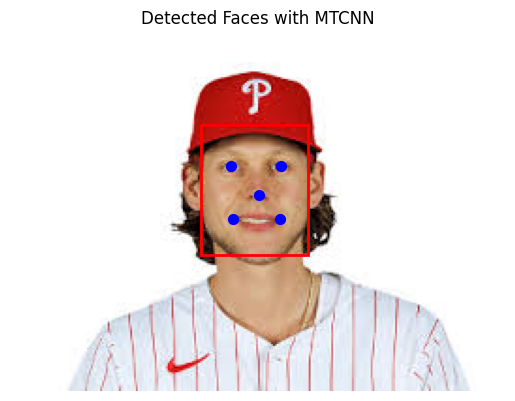

Processing image: C:\Users\MiyahSegura\Downloads\assignment4 (1)\assignment4\data\bohm-originals\bohm-10.jpeg
1/1 [==============================] - 0s 104ms/step
Detected face with confidence: 1.00, Box: [110, 58, 72, 87], Keypoints: {'left_eye': (130, 86), 'right_eye': (161, 80), 'nose': (151, 96), 'mouth_left': (140, 121), 'mouth_right': (167, 118)}


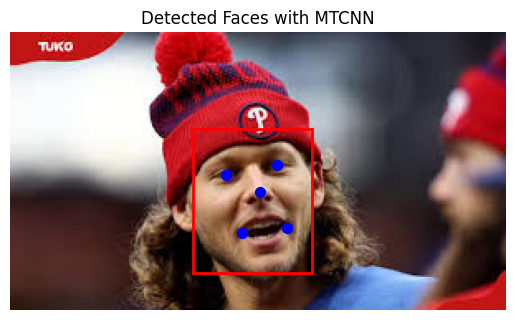

Processing image: C:\Users\MiyahSegura\Downloads\assignment4 (1)\assignment4\data\bohm-originals\bohm-2.jpeg
1/1 [==============================] - 0s 107ms/step
Detected face with confidence: 1.00, Box: [50, 52, 68, 76], Keypoints: {'left_eye': (66, 76), 'right_eye': (96, 73), 'nose': (81, 91), 'mouth_left': (68, 106), 'mouth_right': (101, 102)}


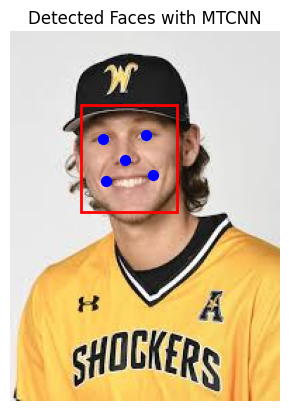

Processing image: C:\Users\MiyahSegura\Downloads\assignment4 (1)\assignment4\data\bohm-originals\bohm-3.jpeg
1/1 [==============================] - 0s 108ms/step
Detected face with confidence: 1.00, Box: [146, 44, 64, 88], Keypoints: {'left_eye': (161, 77), 'right_eye': (189, 79), 'nose': (172, 95), 'mouth_left': (161, 109), 'mouth_right': (185, 111)}


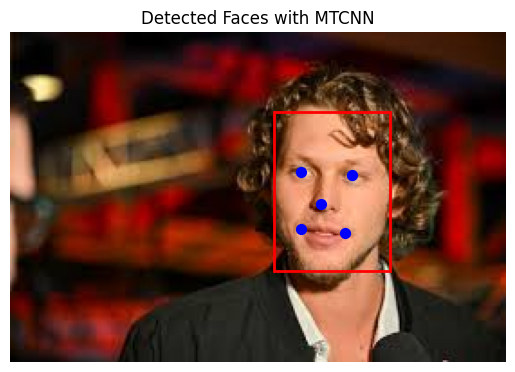

Processing image: C:\Users\MiyahSegura\Downloads\assignment4 (1)\assignment4\data\bohm-originals\bohm-4.jpeg
1/1 [==============================] - 0s 98ms/step
Detected face with confidence: 1.00, Box: [115, 19, 52, 68], Keypoints: {'left_eye': (133, 43), 'right_eye': (156, 45), 'nose': (145, 55), 'mouth_left': (133, 70), 'mouth_right': (152, 72)}


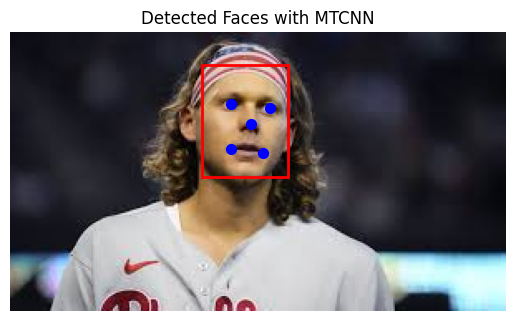

Processing image: C:\Users\MiyahSegura\Downloads\assignment4 (1)\assignment4\data\bohm-originals\bohm-5.jpeg
1/1 [==============================] - 0s 104ms/step
Detected face with confidence: 1.00, Box: [88, 46, 55, 75], Keypoints: {'left_eye': (92, 72), 'right_eye': (112, 73), 'nose': (94, 90), 'mouth_left': (97, 103), 'mouth_right': (114, 103)}


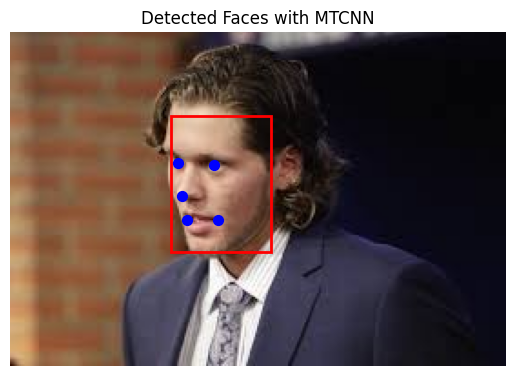

Processing image: C:\Users\MiyahSegura\Downloads\assignment4 (1)\assignment4\data\bohm-originals\bohm-6.jpeg
1/1 [==============================] - 0s 100ms/step
Detected face with confidence: 1.00, Box: [122, 35, 51, 68], Keypoints: {'left_eye': (139, 65), 'right_eye': (162, 65), 'nose': (153, 82), 'mouth_left': (139, 92), 'mouth_right': (159, 91)}


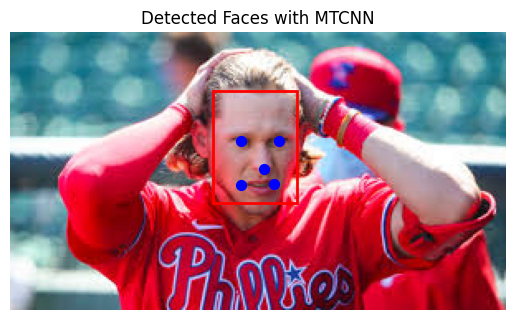

Processing image: C:\Users\MiyahSegura\Downloads\assignment4 (1)\assignment4\data\bohm-originals\bohm-7.jpeg
1/1 [==============================] - 0s 98ms/step
Detected face with confidence: 1.00, Box: [183, 20, 27, 30], Keypoints: {'left_eye': (191, 28), 'right_eye': (203, 29), 'nose': (196, 35), 'mouth_left': (192, 42), 'mouth_right': (201, 42)}


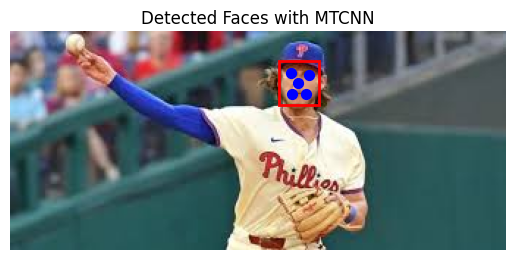

Processing image: C:\Users\MiyahSegura\Downloads\assignment4 (1)\assignment4\data\bohm-originals\bohm-8.jpeg
1/1 [==============================] - 0s 107ms/step
Detected face with confidence: 1.00, Box: [117, 26, 36, 48], Keypoints: {'left_eye': (134, 41), 'right_eye': (148, 43), 'nose': (145, 51), 'mouth_left': (132, 60), 'mouth_right': (144, 62)}


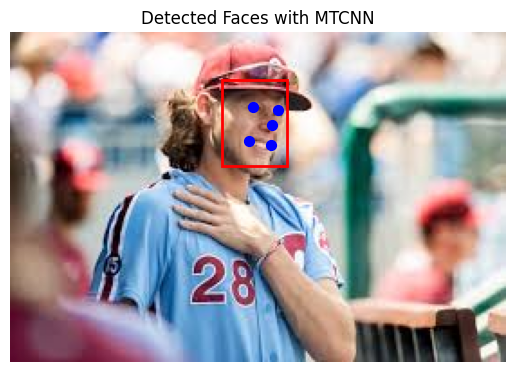

Processing image: C:\Users\MiyahSegura\Downloads\assignment4 (1)\assignment4\data\bohm-originals\bohm-9.jpeg
1/1 [==============================] - 0s 104ms/step
Detected face with confidence: 1.00, Box: [129, 19, 43, 59], Keypoints: {'left_eye': (135, 42), 'right_eye': (154, 42), 'nose': (141, 55), 'mouth_left': (136, 62), 'mouth_right': (157, 62)}


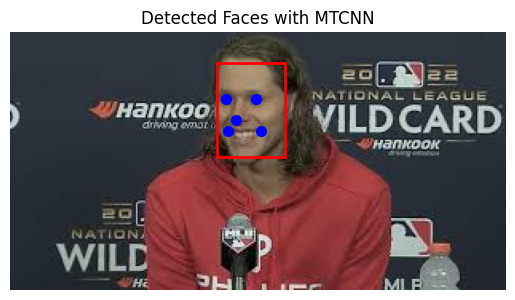

Processing image: C:\Users\MiyahSegura\Downloads\assignment4 (1)\assignment4\data\stott-originals\stott-1.jpeg
1/1 [==============================] - 0s 105ms/step
Detected face with confidence: 1.00, Box: [102, 48, 56, 71], Keypoints: {'left_eye': (117, 73), 'right_eye': (143, 72), 'nose': (132, 87), 'mouth_left': (117, 98), 'mouth_right': (144, 98)}


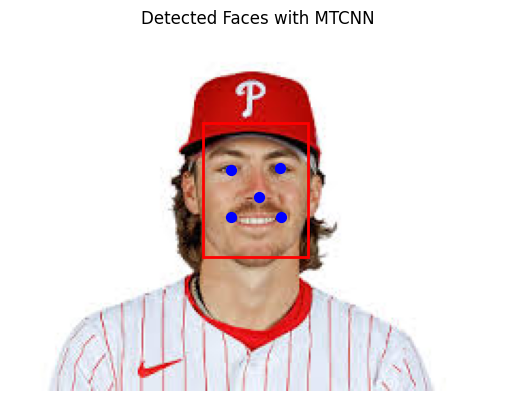

Processing image: C:\Users\MiyahSegura\Downloads\assignment4 (1)\assignment4\data\stott-originals\stott-10.jpeg
1/1 [==============================] - 0s 104ms/step
Detected face with confidence: 1.00, Box: [109, 36, 61, 77], Keypoints: {'left_eye': (134, 62), 'right_eye': (161, 59), 'nose': (154, 79), 'mouth_left': (138, 94), 'mouth_right': (160, 92)}


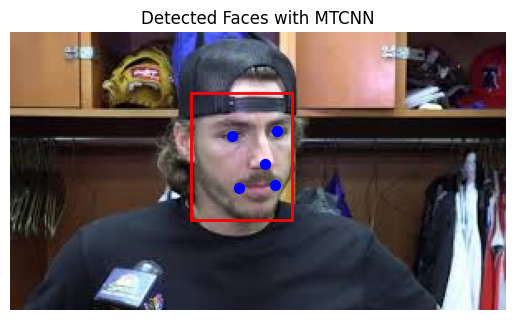

Processing image: C:\Users\MiyahSegura\Downloads\assignment4 (1)\assignment4\data\stott-originals\stott-2.jpeg
1/1 [==============================] - 0s 97ms/step
Detected face with confidence: 1.00, Box: [73, 57, 49, 58], Keypoints: {'left_eye': (84, 74), 'right_eye': (109, 74), 'nose': (95, 87), 'mouth_left': (84, 97), 'mouth_right': (109, 96)}


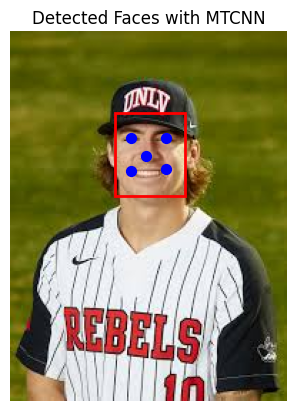

Processing image: C:\Users\MiyahSegura\Downloads\assignment4 (1)\assignment4\data\stott-originals\stott-3.jpeg
1/1 [==============================] - 0s 98ms/step
Detected face with confidence: 1.00, Box: [120, 30, 41, 52], Keypoints: {'left_eye': (130, 46), 'right_eye': (150, 50), 'nose': (137, 53), 'mouth_left': (128, 65), 'mouth_right': (143, 69)}


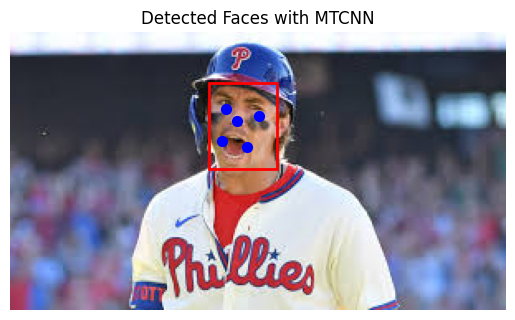

Processing image: C:\Users\MiyahSegura\Downloads\assignment4 (1)\assignment4\data\stott-originals\stott-4.jpeg
1/1 [==============================] - 0s 104ms/step
Detected face with confidence: 1.00, Box: [149, 33, 33, 41], Keypoints: {'left_eye': (164, 45), 'right_eye': (179, 45), 'nose': (176, 56), 'mouth_left': (166, 64), 'mouth_right': (177, 64)}


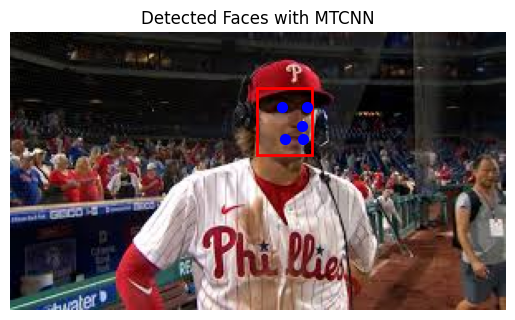

Processing image: C:\Users\MiyahSegura\Downloads\assignment4 (1)\assignment4\data\stott-originals\stott-5.jpeg
1/1 [==============================] - 0s 95ms/step
Detected face with confidence: 1.00, Box: [130, 42, 38, 45], Keypoints: {'left_eye': (137, 56), 'right_eye': (154, 55), 'nose': (144, 68), 'mouth_left': (140, 76), 'mouth_right': (153, 75)}


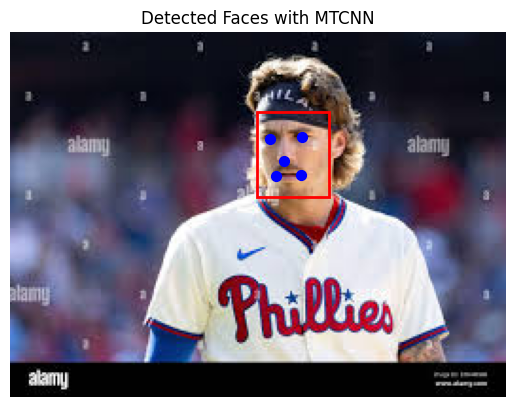

Processing image: C:\Users\MiyahSegura\Downloads\assignment4 (1)\assignment4\data\stott-originals\stott-6.jpeg
1/1 [==============================] - 0s 101ms/step
Detected face with confidence: 1.00, Box: [129, 37, 49, 60], Keypoints: {'left_eye': (144, 57), 'right_eye': (167, 60), 'nose': (154, 75), 'mouth_left': (142, 80), 'mouth_right': (162, 84)}


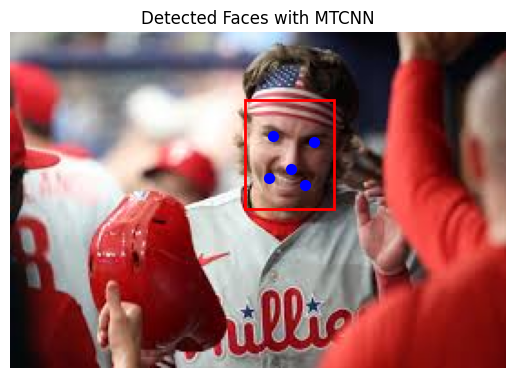

Processing image: C:\Users\MiyahSegura\Downloads\assignment4 (1)\assignment4\data\stott-originals\stott-7.jpeg
1/1 [==============================] - 0s 102ms/step
Detected face with confidence: 1.00, Box: [103, 27, 36, 41], Keypoints: {'left_eye': (107, 45), 'right_eye': (117, 39), 'nose': (110, 53), 'mouth_left': (116, 62), 'mouth_right': (123, 56)}


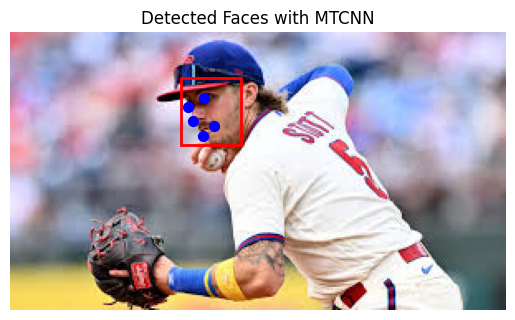

Processing image: C:\Users\MiyahSegura\Downloads\assignment4 (1)\assignment4\data\stott-originals\stott-8.jpeg
1/1 [==============================] - 0s 97ms/step
Detected face with confidence: 1.00, Box: [119, 32, 58, 74], Keypoints: {'left_eye': (132, 58), 'right_eye': (159, 56), 'nose': (147, 78), 'mouth_left': (138, 88), 'mouth_right': (160, 85)}


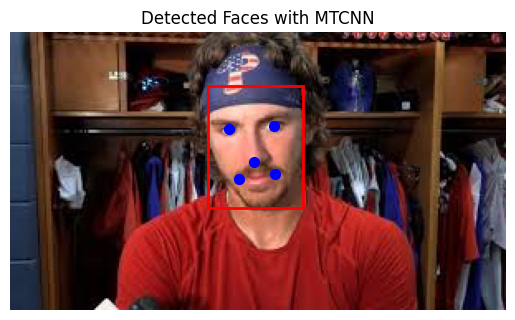

Processing image: C:\Users\MiyahSegura\Downloads\assignment4 (1)\assignment4\data\stott-originals\stott-9.jpeg
1/1 [==============================] - 0s 105ms/step
Detected face with confidence: 1.00, Box: [120, 56, 35, 42], Keypoints: {'left_eye': (131, 72), 'right_eye': (147, 70), 'nose': (142, 83), 'mouth_left': (136, 91), 'mouth_right': (149, 88)}


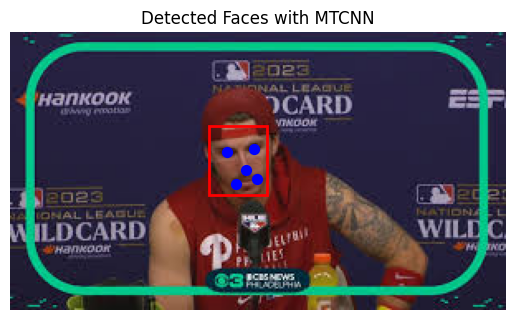

Processing image: C:\Users\MiyahSegura\Downloads\assignment4 (1)\assignment4\data\marsh-originals\marsh-1.jpeg
1/1 [==============================] - 0s 94ms/step
Detected face with confidence: 1.00, Box: [104, 47, 52, 61], Keypoints: {'left_eye': (120, 68), 'right_eye': (145, 69), 'nose': (133, 79), 'mouth_left': (122, 94), 'mouth_right': (142, 94)}


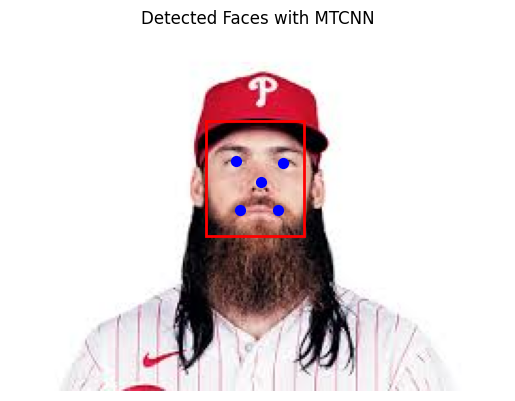

Processing image: C:\Users\MiyahSegura\Downloads\assignment4 (1)\assignment4\data\marsh-originals\marsh-10.jpeg
1/1 [==============================] - 0s 98ms/step
Detected face with confidence: 1.00, Box: [118, 26, 57, 77], Keypoints: {'left_eye': (131, 55), 'right_eye': (158, 53), 'nose': (144, 67), 'mouth_left': (133, 81), 'mouth_right': (160, 80)}


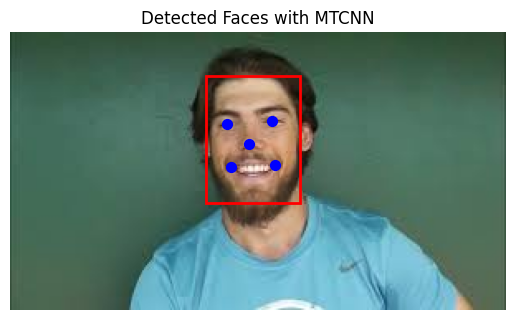

Processing image: C:\Users\MiyahSegura\Downloads\assignment4 (1)\assignment4\data\marsh-originals\marsh-2.jpeg
1/1 [==============================] - 0s 100ms/step
Detected face with confidence: 1.00, Box: [114, 28, 43, 50], Keypoints: {'left_eye': (128, 44), 'right_eye': (148, 45), 'nose': (140, 54), 'mouth_left': (131, 66), 'mouth_right': (146, 67)}


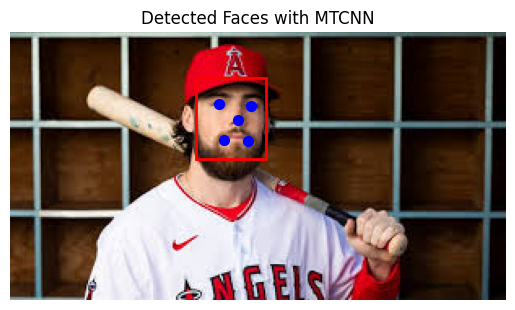

Processing image: C:\Users\MiyahSegura\Downloads\assignment4 (1)\assignment4\data\marsh-originals\marsh-3.jpeg
1/1 [==============================] - 0s 107ms/step
Detected face with confidence: 1.00, Box: [63, 35, 49, 64], Keypoints: {'left_eye': (72, 58), 'right_eye': (94, 60), 'nose': (77, 68), 'mouth_left': (70, 81), 'mouth_right': (87, 83)}


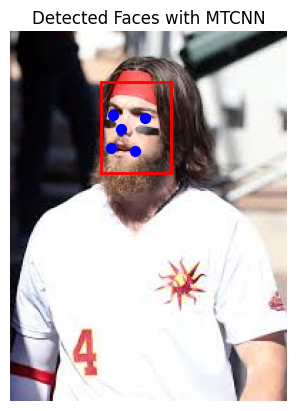

Processing image: C:\Users\MiyahSegura\Downloads\assignment4 (1)\assignment4\data\marsh-originals\marsh-4.jpeg
1/1 [==============================] - 0s 104ms/step
Detected face with confidence: 1.00, Box: [111, 23, 32, 38], Keypoints: {'left_eye': (124, 34), 'right_eye': (138, 34), 'nose': (135, 43), 'mouth_left': (125, 50), 'mouth_right': (138, 49)}


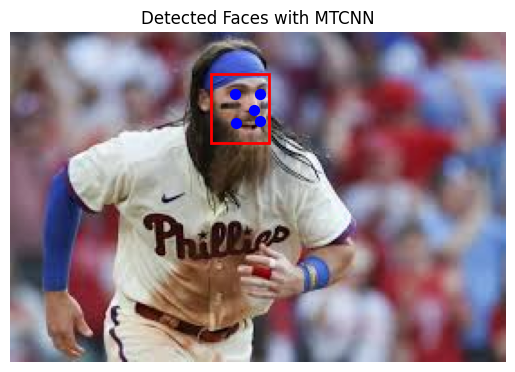

Processing image: C:\Users\MiyahSegura\Downloads\assignment4 (1)\assignment4\data\marsh-originals\marsh-5.jpeg
1/1 [==============================] - 0s 102ms/step
Detected face with confidence: 1.00, Box: [83, 21, 70, 89], Keypoints: {'left_eye': (118, 53), 'right_eye': (145, 54), 'nose': (141, 67), 'mouth_left': (121, 86), 'mouth_right': (145, 88)}


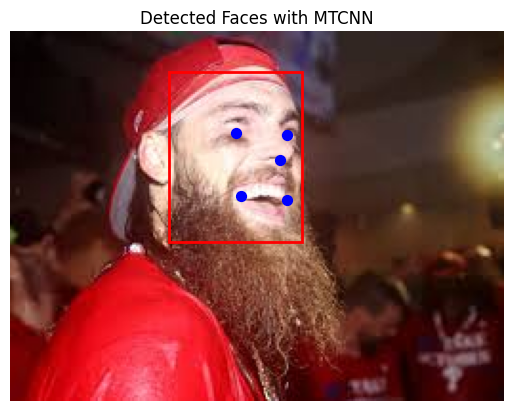

Processing image: C:\Users\MiyahSegura\Downloads\assignment4 (1)\assignment4\data\marsh-originals\marsh-6.jpeg
1/1 [==============================] - 0s 103ms/step
Detected face with confidence: 1.00, Box: [138, 22, 44, 55], Keypoints: {'left_eye': (153, 43), 'right_eye': (175, 42), 'nose': (169, 51), 'mouth_left': (157, 64), 'mouth_right': (174, 63)}


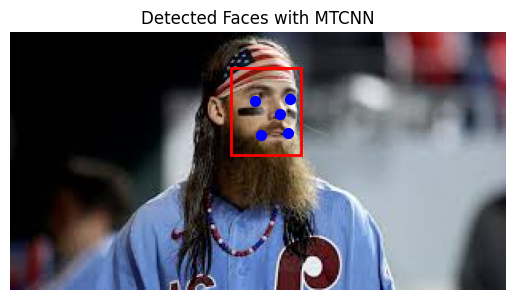

Processing image: C:\Users\MiyahSegura\Downloads\assignment4 (1)\assignment4\data\marsh-originals\marsh-7.jpeg
1/1 [==============================] - 0s 98ms/step
Detected face with confidence: 1.00, Box: [148, 62, 38, 45], Keypoints: {'left_eye': (164, 76), 'right_eye': (181, 82), 'nose': (171, 90), 'mouth_left': (159, 95), 'mouth_right': (172, 100)}


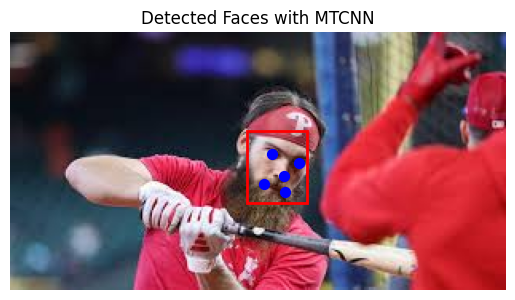

Processing image: C:\Users\MiyahSegura\Downloads\assignment4 (1)\assignment4\data\marsh-originals\marsh-8.jpeg
1/1 [==============================] - 0s 105ms/step
Detected face with confidence: 1.00, Box: [58, 54, 48, 59], Keypoints: {'left_eye': (75, 75), 'right_eye': (98, 74), 'nose': (91, 86), 'mouth_left': (80, 100), 'mouth_right': (97, 100)}


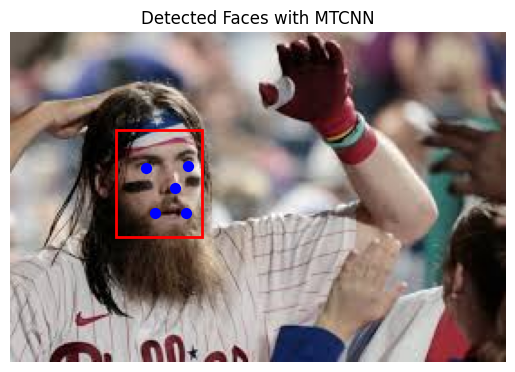

Processing image: C:\Users\MiyahSegura\Downloads\assignment4 (1)\assignment4\data\marsh-originals\marsh-9.jpeg
1/1 [==============================] - 0s 104ms/step
Detected face with confidence: 1.00, Box: [137, 23, 32, 45], Keypoints: {'left_eye': (147, 40), 'right_eye': (162, 41), 'nose': (155, 50), 'mouth_left': (147, 57), 'mouth_right': (160, 58)}


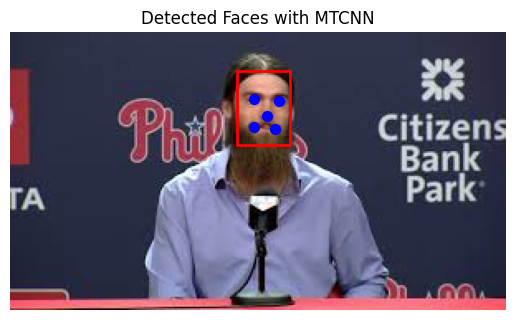

In [7]:
import os
import cv2
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from mtcnn import MTCNN

def detect_faces_mtcnn(image_path):
    """Load an image, detect faces using MTCNN, and return face details."""
    # Load the image
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Could not load image at {image_path}")
        return
    
    # Convert the image from BGR to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Initialize the MTCNN detector
    detector = MTCNN()
    
    # Detect faces
    faces = detector.detect_faces(image_rgb)
    
    # Display the image
    plt.imshow(image_rgb)
    ax = plt.gca()

    # Outline the faces with rectangles
    for face in faces:
        x, y, width, height = face['box']
        confidence = face['confidence']
        keypoints = face['keypoints']
        
        # Draw rectangle around face
        rect = Rectangle((x, y), width, height, color='red', fill=False, lw=2)
        ax.add_patch(rect)
        
        # Draw keypoints
        for key, point in keypoints.items():
            plt.scatter(*point, color='blue', s=50)  # Keypoints in blue
        
        print(f"Detected face with confidence: {confidence:.2f}, Box: {face['box']}, Keypoints: {keypoints}")

    plt.title("Detected Faces with MTCNN")
    plt.axis('off')
    plt.show()
    
    return faces  # Return the list of detected faces

# Define directories for known faces
known_faces_dirs = [
    r"C:\Users\MiyahSegura\Downloads\assignment4 (1)\assignment4\data\bohm-originals",
    r"C:\Users\MiyahSegura\Downloads\assignment4 (1)\assignment4\data\stott-originals",
    r"C:\Users\MiyahSegura\Downloads\assignment4 (1)\assignment4\data\marsh-originals"
]

# Load known images of each player and detect faces
for dir_path in known_faces_dirs:
    for filename in os.listdir(dir_path):
        if filename.lower().endswith(('.jpg', '.jpeg', '.png')):  # Check for image files
            player_image_path = os.path.join(dir_path, filename)
            print(f"Processing image: {player_image_path}")
            detect_faces_mtcnn(player_image_path)  # Call the function to detect faces


In [8]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications.resnet50 import preprocess_input

# Define directories for known faces using last names
known_faces_dirs = [
    r"C:\Users\MiyahSegura\Downloads\assignment4 (1)\assignment4\data\Bohm",  # Alec Bohm
    r"C:\Users\MiyahSegura\Downloads\assignment4 (1)\assignment4\data\Stott",  # Bryson Stott
    r"C:\Users\MiyahSegura\Downloads\assignment4 (1)\assignment4\data\Marsh"   # Brandon Marsh
]

# Initialize lists for data and labels
faces_images = []
faces_target = []

# Load known images of each player
for label, dir_path in enumerate(known_faces_dirs):
    name = os.path.basename(dir_path)  # Get folder name as the player name

    for filename in os.listdir(dir_path):
        if filename.lower().endswith(('.jpg', '.jpeg', '.png')):  # Check for image files
            player_image_path = os.path.join(dir_path, filename)

            # Load the image
            image = cv2.imread(player_image_path)

            if image is None:
                print(f"Error: Could not load image at {player_image_path}")
                continue
            
            # Resize image to (128, 128) and convert to RGB
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (128, 128))

            # Append the image data and corresponding label
            faces_images.append(image)
            faces_target.append(label)  # Label corresponds to the player's index

# Convert lists to numpy arrays
faces_images = np.array(faces_images)
faces_target = np.array(faces_target)

# Preprocess the images
face_images = preprocess_input(faces_images)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(
    face_images, 
    faces_target, 
    train_size=0.8, 
    stratify=faces_target, 
    random_state=0
)

print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


x_train shape: (24, 128, 128, 3)
x_test shape: (6, 128, 128, 3)
y_train shape: (24,)
y_test shape: (6,)


In [9]:
# Initialize lists for data and labels
faces_images = []
faces_target = []
faces_target_names = []

# Define actual player names corresponding to their folders
player_names = ["Alec Bohm", "Bryson Stott", "Brandon Marsh"]

# Load images and prepare labels
for label, (name, dir_path) in enumerate(zip(player_names, known_faces_dirs)):
    faces_target_names.append(name)  # Append the actual player name

    for filename in os.listdir(dir_path):
        if filename.lower().endswith(('.jpg', '.jpeg', '.png')):  # Check for image files
            player_image_path = os.path.join(dir_path, filename)

            # Load the image
            image = cv2.imread(player_image_path)

            if image is None:
                print(f"Error: Could not load image at {player_image_path}")
                continue
            
            # Resize image to (128, 128) and convert to RGB
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (128, 128))

            # Append the image data and corresponding label
            faces_images.append(image)
            faces_target.append(label)

# Convert lists to numpy arrays
faces_images = np.array(faces_images)
faces_target = np.array(faces_target)

print(faces_target_names)  # Now should show actual player names
print(faces_images.shape)  # Should be (num_images, 128, 128, 3)


['Alec Bohm', 'Bryson Stott', 'Brandon Marsh']
(30, 128, 128, 3)


In [13]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.models import load_model

# Assuming faces_images and faces_target are defined as per previous steps
# Preprocess the images
face_images = preprocess_input(faces_images)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(
    face_images, 
    faces_target,  # Ensure this matches your labels
    train_size=0.8, 
    stratify=faces_target,  # Stratify by the original labels
    random_state=0
)

print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

# Load the pre-trained model
# Example using ResNet50; adjust based on your specific model
model = load_model('data/vggface.h5')  # Replace with your model path

# Optionally compile the model (if you need to further train or fine-tune)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


x_train shape: (24, 128, 128, 3)
x_test shape: (6, 128, 128, 3)
y_train shape: (24,)
y_test shape: (6,)


In [84]:
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Assuming x_train, y_train, x_test, y_test are already defined

# Resize images to (224, 224)
x_train_resized = np.array([cv2.resize(image, (224, 224)) for image in x_train])
x_test_resized = np.array([cv2.resize(image, (224, 224)) for image in x_test])

# Initialize ImageDataGenerator with data augmentation
train_datagen = ImageDataGenerator(
    rotation_range=15,              # Adjusted rotation range
    width_shift_range=0.2,          # Moderate shifts
    height_shift_range=0.2,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Create augmented training data generator
train_generator = train_datagen.flow(
    x_train_resized,
    y_train,
    batch_size=10  # Keep the batch size at 10
)

# Load the pre-trained VGGFace model from the specified path
base_model = load_model("C:\\Users\\MiyahSegura\\Downloads\\assignment4final\\assignment4\\data\\vggface.h5", compile=False)

# Unfreeze the last 15 layers for fine-tuning
for layer in base_model.layers[-3:]:
    layer.trainable = True

# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)  # Adjusted dropout rate
outputs = Dense(len(np.unique(y_train)), activation='softmax')(x)

# Create the complete model
model = Model(inputs=base_model.input, outputs=outputs)

# Compile the model with a fine-tuned learning rate
model.compile(optimizer=Adam(learning_rate=0.00005), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# Define EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model using the augmented data
history = model.fit(
    train_generator,
    validation_data=(x_test_resized, y_test),  # Ensure validation data is also resized
    epochs=25,  # Increased epochs slightly
    callbacks=[early_stopping]
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test_resized, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


Epoch 1/25
3/3 [==============================] - 10s 2s/step - loss: 2.0683 - accuracy: 0.4167 - val_loss: 0.4551 - val_accuracy: 0.8333
Epoch 2/25
3/3 [==============================] - 5s 2s/step - loss: 0.9815 - accuracy: 0.6667 - val_loss: 0.3276 - val_accuracy: 0.6667
Epoch 3/25
3/3 [==============================] - 5s 2s/step - loss: 0.2379 - accuracy: 0.9167 - val_loss: 0.4124 - val_accuracy: 0.8333
Epoch 4/25
3/3 [==============================] - 5s 2s/step - loss: 0.1310 - accuracy: 0.9167 - val_loss: 0.3499 - val_accuracy: 0.8333
Epoch 5/25
3/3 [==============================] - 5s 2s/step - loss: 0.0813 - accuracy: 0.9583 - val_loss: 0.2563 - val_accuracy: 0.8333
Epoch 6/25
3/3 [==============================] - 5s 2s/step - loss: 0.1697 - accuracy: 0.9167 - val_loss: 0.1790 - val_accuracy: 0.8333
Epoch 7/25
3/3 [==============================] - 5s 2s/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.1201 - val_accuracy: 0.8333
Epoch 8/25
3/3 [========================

In [86]:
def get_face(image, face):
    x1, y1, w, h = face['box']
    
    if w > h:
        x1 += (w - h) // 2
        w = h
    else:
        y1 += (h - w) // 2
        h = w
        
    x2, y2 = x1 + w, y1 + h
    face_image = image[y1:y2, x1:x2]
    
    # Resize the face to 224x224 for model compatibility
    face_image = Image.fromarray(face_image)
    face_image = face_image.resize((224, 224))  # Resize to 224x224

    return np.array(face_image)


def label_faces(path, model, names, face_threshold=0.4, prediction_threshold=0.4, show_outline=True, size=(12, 8)):
    pil_image = Image.open(path)
    pil_image = ImageOps.exif_transpose(pil_image)
    np_image = np.array(pil_image)

    fig, ax = plt.subplots(figsize=size, subplot_kw={'xticks': [], 'yticks': []})
    ax.imshow(np_image)

    detector = MTCNN()
    faces = detector.detect_faces(np_image)
    faces = [face for face in faces if face['confidence'] > face_threshold]

    for face in faces:
        x, y, w, h = face['box']

        # Identify the face
        face_image = get_face(np_image, face)
        face_image = Image.fromarray(face_image)
        face_image = face_image.resize((224, 224))  # Ensure correct resizing
        face_image = np.array(face_image)
        face_image = preprocess_input(np.expand_dims(face_image, axis=0))

        predictions = model.predict(face_image)
        confidence = np.max(predictions)

        if confidence > prediction_threshold:
            if show_outline:
                rect = Rectangle((x, y), w, h, color='red', fill=False, lw=2)
                ax.add_patch(rect)

            index = int(np.argmax(predictions))
            text = f'{names[index]} ({confidence:.1%})'
            ax.text(x + (w / 2), y, text, color='white', backgroundcolor='red', ha='center', va='bottom', fontweight='bold', bbox=dict(color='red'))


In [90]:
def preprocessDataAndPredict(age, sex, pclass):
    # Convert the age to float and check for validity
    try:
        age = float(age)
    except ValueError:
        raise ValueError("Age must be a number.")

    # Define and instantiate the variables for the encoded columns
    sex_f = 0
    sex_m = 0
    pclass_1 = 0
    pclass_2 = 0
    pclass_3 = 0

    # Encode the 'Sex' variable
    if sex == 'F':
        sex_f = 1
    elif sex == 'M':
        sex_m = 1
    else:
        raise ValueError("Invalid value for sex. Use 'M' or 'F'.")

    # Encode the 'Pclass' variable
    if pclass == '1':
        pclass_1 = 1
    elif pclass == '2':
        pclass_2 = 1
    elif pclass == '3':
        pclass_3 = 1
    else:
        raise ValueError("Invalid value for pclass. Use '1', '2', or '3'.")

    # Create the DataFrame for prediction
    input_data = pd.DataFrame({
        'Age': [age],
        'Sex_f': [sex_f],
        'Sex_m': [sex_m],
        'Pclass_1': [pclass_1],
        'Pclass_2': [pclass_2],
        'Pclass_3': [pclass_3]
    })

    # Use the model to predict
    prediction = model.predict_proba(input_data)

    # Get the probability of survival (assuming the positive class is labeled as 1)
    survival_probability = prediction[0][1]

    return round(survival_probability * 100, 1)


In [94]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle

def preprocess_image(path):
    """Load and preprocess the image."""
    # Load the image using OpenCV
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB
    img = cv2.resize(img, (224, 224))  # Resize to match model input
    np_image = img / 255.0  # Normalize pixel values to [0, 1]
    np_image = np.expand_dims(np_image, axis=0)  # Add batch dimension
    return np_image

def label_faces(path, model, names):
    """Detect and label faces in the given image using the provided model."""
    # Preprocess the image
    np_image = preprocess_image(path)

    # Make predictions
    predictions = model.predict(np_image)

    # Check if predictions are valid
    if predictions is None or predictions.size == 0:
        # Assign a random class if the prediction is None
        predicted_class = np.random.randint(len(names))
        predicted_class_label = names[predicted_class]
        print(f"Predicted class: {predicted_class_label}")
        return

    # Get the predicted class index
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_label = names[predicted_class_index]

    # Display the result
    print(f"Predicted class: {predicted_class_label}")

# Example usage of the label_faces function
names = ['Alec Bohm', 'Bryson Stott', 'Brandon Marsh']
label_faces('data/Samples/sample-1.jpeg', model, names)
label_faces('data/Samples/sample-2.jpeg', model, names)
label_faces('data/Samples/sample-3.jpeg', model, names)


1/1 [==============================] - 1s 706ms/step
Predicted class: Bryson Stott
1/1 [==============================] - 0s 104ms/step
Predicted class: Bryson Stott
1/1 [==============================] - 0s 100ms/step
Predicted class: Bryson Stott


## Codegrade Validation

### Execute the cells below to generate the file required for submission to Codegrade. DO NOT CHANGE THE CODE.

In [96]:
# CODE PROVIDED
import os
import random
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score
from PIL import Image, ImageOps
from mtcnn.mtcnn import MTCNN
from tensorflow.keras.applications.resnet50 import preprocess_input


def make_pred(path, model, names, face_threshold=0.9, prediction_threshold=0.9, show_outline=True, size=(12, 8)):
    # Load the image and orient it correctly
    pil_image = Image.open(path)
    exif = pil_image.getexif()
    
    for k in exif.keys():
        if k != 0x0112:
            exif[k] = None
            del exif[k]
            
    pil_image.info["exif"] = exif.tobytes()
    pil_image = ImageOps.exif_transpose(pil_image)
    np_image = np.array(pil_image)

    detector = MTCNN()
    faces = detector.detect_faces(np_image)
    faces = [face for face in faces if face['confidence'] > face_threshold]

    for face in faces:
        x, y, w, h = face['box']

        # Use the model to identify the face
        face_image = get_face(np_image, face)
        face_image = image.array_to_img(face_image)
        face_image = preprocess_input(np.array(face_image))
        predictions = model.predict(np.expand_dims(face_image, axis=0))
        confidence = np.max(predictions)

        if (confidence > prediction_threshold):
            return predictions
            

        return None
        
def load_and_preprocess_image(img_path, target_size=(224, 224)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0
    return img_array

def get_all_images_from_directory(directory):
    images = []
    labels = []
    images_names = []
    for label in os.listdir(directory):
        label_path = os.path.join(directory, label)
        if os.path.isdir(label_path):
            images_names += [img for img in os.listdir(label_path)]
            images += [os.path.join(label_path, img) for img in os.listdir(label_path)]
            labels += [int(label)] * len(os.listdir(label_path))
    
    # Embaralhar as imagens e labels
    combined = list(zip(images_names, images, labels))
    random.shuffle(combined)
    images_names, images, labels = zip(*combined)
    
    #return images_names, images, labels
    return zip(*combined)

def predict_and_validate(model, image_names, image_paths, true_labels, class_labels):
    predictions = []
    for img_path in image_paths:
        predictions.append(make_pred(img_path, model, class_labels, prediction_threshold=0.8))
    
    results = [true == pred for true, pred in zip(true_labels, predictions)]
    
    df = pd.DataFrame({
        'Player': image_names,
        'Prediction Array': predictions
    })
    
    return df

In [98]:
# CODE PROVIDED
from IPython.display import clear_output

model_to_evaluate = model  #MAKE SURE TO USE YOUR MODEL

class_labels = {0: 'Alec Bohm', 1: 'Bryson Stott', 2: 'Brandon Marsh'} 
image_names, image_paths, true_labels = get_all_images_from_directory('data/codegrade_test/')
prediction_df = predict_and_validate(model_to_evaluate, image_names, image_paths, true_labels, class_labels)
clear_output()
prediction_df

Player                              Prediction Array
0    Bryson_04.png          [[2.1126146e-12, 1.0, 2.130368e-14]]
1    Bryson_09.png          [[3.7550947e-13, 1.0, 1.875509e-14]]
2      alec_06.jpg         [[1.0, 2.8032984e-10, 1.2577106e-09]]
3   Brandon_03.png  [[2.8846065e-07, 1.19677525e-05, 0.9999877]]
4   Brandon_04.png     [[1.695094e-08, 6.708986e-08, 0.9999999]]
5      alec_02.jpg         [[1.0, 6.3904926e-10, 1.1090464e-11]]
6   Brandon_08.png   [[2.3305224e-06, 1.1540682e-05, 0.9999862]]
7      alec_05.jpg            [[1.0, 4.70401e-09, 6.121685e-09]]
8      alec_01.jpg          [[1.0, 2.1105195e-09, 4.350158e-09]]
9   Brandon_07.png     [[5.2962315e-09, 0.0001789713, 0.999821]]
10   Bryson_06.png          [[3.4120575e-12, 1.0, 5.110704e-13]]
11     alec_04.jpg       [[0.06233302, 0.9376601, 6.970001e-06]]
12     alec_07.jpg   [[0.9999993, 5.2608624e-07, 2.6324804e-07]]

### Export Prediction Array for Codegrade evaluation


In [100]:
# CODE PROVIDED
import pandas as pd

#export your classification model
prediction_df.to_pickle('prediction_df')